In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import altair as alt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [6]:
churn_df = pd.read_excel("data/model_data_raw.xlsx", sheet_name='vw_churndata')
churn_df.shape

(6007, 32)

### 1.1 Data splitting 
rubric={autograde}

In order to avoid violation of the golden rule, the first step before we do anything is splitting the data. 

**our tasks:**

1. Split the data into `train_df` (80%) and `test_df` (20%) with `random_state = 123`. Keep the target column (`customer_status`) in the splits so that we can use it in the exploratory data analysis.  

In [10]:
train_df = None
test_df = None

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(churn_df, test_size=0.2, random_state=123)

Let's examine our `train_df`. 

In [11]:
train_df.sort_index()

customer_id  gender  age married          state  number_of_referrals  \
0      19877-DEL    Male   35      No          Delhi                    7   
1      58353-MAH  Female   45     Yes    Maharashtra                   14   
2      25063-WES    Male   51      No    West Bengal                    4   
3      59787-KAR    Male   79      No      Karnataka                    3   
4      28544-TAM  Female   80      No     Tamil Nadu                    3   
...          ...     ...  ...     ...            ...                  ...   
6001   68167-MAH  Female   56      No    Maharashtra                   15   
6002   43397-UTT  Female   41      No  Uttar Pradesh                    6   
6003   22240-HAR    Male   51     Yes        Haryana                    0   
6004   78682-KER  Female   65     Yes         Kerala                   14   
6005   17816-ODI    Male   23      No         Odisha                    2   

      tenure_in_months value_deal phone_service multiple_lines  ...  \
0                   27        NaN           Yes             No  ...   
1                   13        NaN           Yes            Yes  ...   
2                   35     Deal 5           Yes             No  ...   
3                   21     Deal 4           Yes             No  ...   
4                    8        NaN           Yes             No  ...   
...                ...        ...           ...            ...  ...   
6001                25     Deal 5           Yes            Yes  ...   
6002                33        NaN           Yes            Yes  ...   
6003                19     Deal 1            No             No  ...   
6004                25        NaN           Yes            Yes  ...   
6005                10        NaN           Yes            Yes  ...   

       payment_method monthly_charge total_charges total_refunds  \
0         Credit Card          65.60        593.30          0.00   
1         Credit Card          -4.00        542.40         38.33   
2     Bank Withdrawal          73.90        280.85          0.00   
3     Bank Withdrawal          98.00       1237.85          0.00   
4         Credit Card          83.90        267.40          0.00   
...               ...            ...           ...           ...   
6001  Bank Withdrawal          85.00         85.00          0.00   
6002      Credit Card          74.40        896.75          0.00   
6003      Credit Card          45.25       3139.80          0.00   
6004  Bank Withdrawal          74.95       2869.85          0.00   
6005      Credit Card          70.15       4480.70          0.00   

     total_extra_data_charges total_long_distance_charges total_revenue  \
0                           0                      381.51        974.81   
1                          10                       96.21        610.28   
2                           0                      134.60        415.45   
3                           0                      361.66       1599.51   
4                           0                       22.14        289.54   
...                       ...                         ...           ...   
6001                        0                       30.52        115.52   
6002                        0                       37.96        934.71   
6003                        0                        0.00       3139.80   
6004                        0                      599.64       3469.49   
6005                        0                     2107.52       6588.22   

     customer_status   churn_category                   churn_reason  
0             Stayed           Others                         Others  
1             Stayed           Others                         Others  
2            Churned       Competitor  Competitor had better devices  
3            Churned  Dissatisfaction        Product dissatisfaction  
4            Churned  Dissatisfaction            Network reliability  
...              ...              ...                            ...  
6001        

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4805 entries, 207 to 3582
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_id                  4805 non-null   object 
 1   gender                       4805 non-null   object 
 2   age                          4805 non-null   int64  
 3   married                      4805 non-null   object 
 4   state                        4805 non-null   object 
 5   number_of_referrals          4805 non-null   int64  
 6   tenure_in_months             4805 non-null   int64  
 7   value_deal                   2159 non-null   object 
 8   phone_service                4805 non-null   object 
 9   multiple_lines               4805 non-null   object 
 10  internet_service             4805 non-null   object 
 11  internet_type                3816 non-null   object 
 12  online_security              4805 non-null   object 
 13  online_backup        

Although we used train_df.info() and it showed non-null values for all columns, this does not necessarily mean that there are no NaN (Not a Number) values in the dataset. The info() method indicates that there are no completely empty entries for any column, but it doesn't differentiate between truly non-null values and values like NaN, which can be present but are technically still 'non-null' in terms of data type compatibility. Therefore, to accurately check for NaN values, we need to use methods like `df.isnull().sum()` or `df.isna().sum()` to see the actual count of missing values in the dataset

In [14]:
train_df.isnull().sum()

customer_id                       0
gender                            0
age                               0
married                           0
state                             0
number_of_referrals               0
tenure_in_months                  0
value_deal                     2646
phone_service                     0
multiple_lines                    0
internet_service                  0
internet_type                   989
online_security                   0
online_backup                     0
device_protection_plan            0
premium_support                   0
streaming_tv                      0
streaming_movies                  0
streaming_music                   0
unlimited_data                    0
contract                          0
paperless_billing                 0
payment_method                    0
monthly_charge                    0
total_charges                     0
total_refunds                     0
total_extra_data_charges          0
total_long_distance_charges 

If there were any null values, we could use `df[:50].style.highlight_null()` to see the first 50 rows with the NaN values highlighted.

In [15]:
train_df[:50].style.highlight_null()

### 1.2 `describe()` method

**our tasks:**

1. Examine the output of `train_df.describe()` with `include='all'` argument and store it in a variable called `churn_summary`.

In [16]:
churn_summary = train_df.describe(include="all")
churn_summary

customer_id  gender          age married          state  \
count         4805    4805  4805.000000    4805           4805   
unique        4805       2          NaN       2             22   
top      46547-GUJ  Female          NaN      No  Uttar Pradesh   
freq             1    3011          NaN    2406            459   
mean           NaN     NaN    47.249324     NaN            NaN   
std            NaN     NaN    16.825990     NaN            NaN   
min            NaN     NaN    18.000000     NaN            NaN   
25%            NaN     NaN    33.000000     NaN            NaN   
50%            NaN     NaN    47.000000     NaN            NaN   
75%            NaN     NaN    60.000000     NaN            NaN   
max            NaN     NaN    84.000000     NaN            NaN   

        number_of_referrals  tenure_in_months value_deal phone_service  \
count           4805.000000       4805.000000       2159          4805   
unique                  NaN               NaN          5             2   
top                     NaN               NaN     Deal 2           Yes   
freq                    NaN               NaN        616          4328   
mean               7.455567         17.367534        NaN           NaN   
std                4.600252         10.530525        NaN           NaN   
min                0.000000          1.000000        NaN           NaN   
25%                3.000000          8.000000        NaN           NaN   
50%                7.000000         17.000000        NaN           NaN   
75%               11.000000         26.000000        NaN           NaN   
max               15.000000         36.000000        NaN           NaN   

       multiple_lines  ...   payment_method monthly_charge total_charges  \
count            4805  ...             4805    4805.000000   4805.000000   
unique              2  ...                3            NaN           NaN   
top                No  ...  Bank Withdrawal            NaN           NaN   
freq             2693  ...             2712            NaN           NaN   
mean              NaN  ...              NaN      64.704121   2406.990289   
std               NaN  ...              NaN      31.154939   2248.184115   
min               NaN  ...              NaN     -10.000000     19.100000   
25%               NaN  ...              NaN      35.400000    552.900000   
50%               NaN  ...              NaN      70.800000   1525.350000   
75%               NaN  ...              NaN      90.100000   3921.100000   
max               NaN  ...              NaN     118.750000   8684.800000   

       total_refunds total_extra_data_charges total_long_distance_charges  \
count    4805.000000              4805.000000                 4805.000000   
unique           NaN                      NaN                         NaN   
top              NaN                      NaN                         NaN   
freq             NaN                      NaN                         NaN   
mean        2.012406                 7.048907                  790.651767   
std         8.035594                25.418043                  852.192822   
min         0.000000                 0.000000                    0.000000   
25%         0.000000                 0.000000                  106.290000   
50%         0.000000                 0.000000                  461.500000   
75%         0.000000                 0.000000                 1259.820000   
max        49.790000               150.000000                 3564.720000   

       total_revenue customer_status churn_category churn_reason  
count    4805.000000            4805           4805         4805  
unique           NaN               2              6           21  
top              NaN          Stayed         Others       Others  
freq             NaN            3421           3421         3421  
mean     3202.678558             NaN            NaN          NaN  
std      2833.009191             NaN            NaN          NaN  
min        21.6100

In [25]:
numeric_cols = train_df.select_dtypes('number').columns.tolist()
numeric_cols

['age',
 'number_of_referrals',
 'tenure_in_months',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue']

In [26]:
# You could extract the columns like this, but we will write them out for clarity here
alt.Chart(train_df).mark_bar().encode(
     alt.X(alt.repeat()).type('quantitative').bin(maxbins=40),
     y='count()',
).properties(
    width=300,
    height=200
).repeat(
    ['age',
 'number_of_referrals',
 'tenure_in_months',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue']
)

alt.RepeatChart(...)

We also want to learn more about the two columns that have missing values: `value_deal` and `internet_type`.

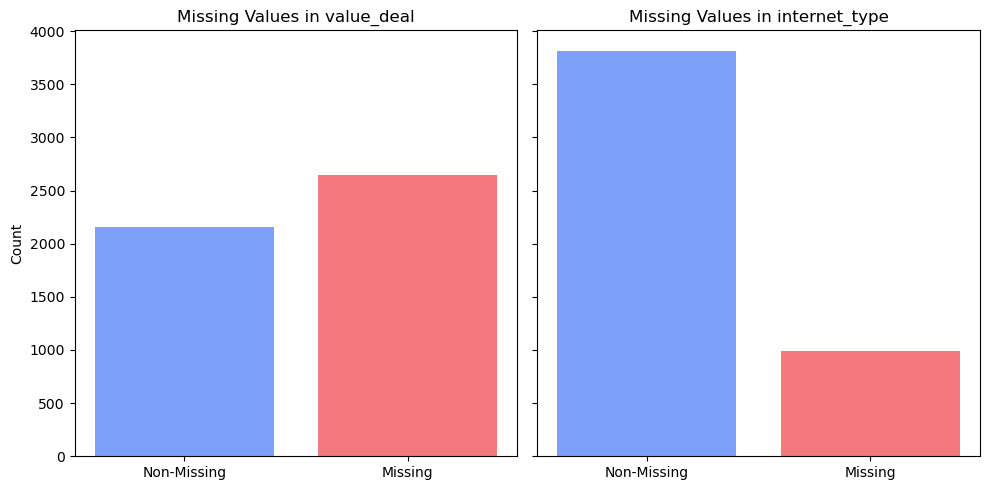

In [30]:
# Calculate missing values
missing_value_deal = train_df['value_deal'].isnull().sum()
missing_internet_type = train_df['internet_type'].isnull().sum()

# Calculate total rows for reference
total_rows = train_df.shape[0]

# Data for plotting
data = {
    'value_deal': [total_rows - missing_value_deal, missing_value_deal],
    'internet_type': [total_rows - missing_internet_type, missing_internet_type]
}

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Plot for value_deal
axes[0].bar(['Non-Missing', 'Missing'], data['value_deal'], color=['#7DA0FA', '#F3797E'])
axes[0].set_title('Missing Values in value_deal')
axes[0].set_ylabel('Count')

# Plot for internet_type
axes[1].bar(['Non-Missing', 'Missing'], data['internet_type'], color=['#7DA0FA', '#F3797E'])
axes[1].set_title('Missing Values in internet_type')

# Show the plots
plt.tight_layout()
plt.show()

Handling Missing Values in value_deal and internet_type Columns

For the value_deal column, over 50% of the data is missing, making mode imputation potentially biased. Instead, we recommend using a new category like "Unknown" to avoid skewing the data. For the internet_type column, where fewer values are missing, imputing with the most frequent category is appropriate. This method ensures a balanced approach to handling missing data, maintaining the dataset's accuracy and integrity.